In [1]:
# Load the 2015 sales data and create a small feature list
import numpy as np
import geopandas as gpd

stp_sales_2015 = gpd.read_file('./data/parcels/stpete_sales_2015.shp')
stp_sales_2015["x"] = stp_sales_2015.centroid.map(lambda p: p.x)
stp_sales_2015["y"] = stp_sales_2015.centroid.map(lambda p: p.y)
stp_sales_2015_x = stp_sales_2015[['AVE_FAM_SZ', 'AVE_HH_SZ', 'MED_AGE', 'x', 'y', 'lisa']]
stp_sales_2015_x

,AVE_FAM_SZ,AVE_HH_SZ,MED_AGE,x,y,lisa
0,2.777506,2.19,46,-82.642882,27.810570,0.003335
1,2.777506,2.19,46,-82.646179,27.811467,-0.016896
2,2.777506,2.19,46,-82.644930,27.812377,-0.007321
3,2.777506,2.19,46,-82.643034,27.813685,0.016612
4,2.777506,2.19,46,-82.644526,27.813679,0.107844
5,2.777506,2.19,46,-82.644526,27.813679,0.065061
6,3.409266,2.03,40,-82.636362,27.814621,-0.002312
7,3.409266,2.03,40,-82.635840,27.814619,0.124945
8,3.409266,2.03,40,-82.635399,27.815135,-0.101599
9,2.027027,1.59,39,-82.636061,27.816035,0.073241


In [2]:
# Create an 80/20 training test split
from sklearn.cross_validation import train_test_split
FIGSIZE = (11, 7)
# # split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(stp_sales_2015_x,
                                                    stp_sales_2015['price'],
                                                    test_size=0.2,
                                                    random_state=1)
names = stp_sales_2015_x.columns.values
X_train

/home/tankofvines/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,AVE_FAM_SZ,AVE_HH_SZ,MED_AGE,x,y,lisa
975,3.321267,2.68,45,-82.722219,27.802207,-0.055585
799,3.368039,2.68,44,-82.631658,27.734915,0.133057
1851,3.966667,3.19,39,-82.694802,27.779365,0.204703
1114,3.709302,2.26,43,-82.752388,27.800284,-0.004582
3090,3.607981,2.46,36,-82.673372,27.711176,-0.005852
3067,2.652913,1.91,58,-82.683745,27.725009,1.208676
3645,3.368030,2.47,43,-82.607794,27.810258,-0.095674
2456,3.798913,3.28,37,-82.681386,27.767093,0.758734
305,2.437086,1.47,41,-82.642526,27.784171,0.170910
1468,3.804348,2.39,34,-82.658787,27.794137,0.085605


In [3]:
import pandas as pd
X_df = pd.DataFrame(data=X_train, columns=names)
X_df['price'] = y_train
_ = X_df.hist(column=['AVE_FAM_SZ', 'AVE_HH_SZ', 'MED_AGE', 'x', 'y'], figsize=FIGSIZE)

In [4]:
# Create a GBM regressor and compare to other models
import time
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from collections import defaultdict
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR

res = defaultdict(dict)

def benchmark(est, name=None):
    if not name:
        name = est.__class__.__name__
    t0 = time.clock()
    est.fit(X_train, y_train)
    res[name]['train_time'] = time.clock() - t0
    t0 = time.clock()
    pred = est.predict(X_test)
    res[name]['test_time'] = time.clock() - t0
    res[name]['MAE'] = mean_absolute_error(y_test, pred)
    return est
    
benchmark(DummyRegressor())
benchmark(Ridge(alpha=0.0001, normalize=True))
benchmark(Pipeline([('std', StandardScaler()), 
                    ('svr', SVR(kernel='rbf', C=10.0, gamma=0.1, tol=0.001))]), name='SVR')
benchmark(RandomForestRegressor(n_estimators=100, max_features=5, random_state=0, 
                                bootstrap=False, n_jobs=4))
est = benchmark(GradientBoostingRegressor(n_estimators=500, max_depth=4, learning_rate=0.1,
                                          loss='huber', min_samples_leaf=3, 
                                          random_state=0))

res_df = pd.DataFrame(data=res).T
res_df[['train_time', 'test_time', 'MAE']].sort('MAE', ascending=False)

/home/tankofvines/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:39: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,train_time,test_time,MAE
DummyRegressor,0.000859,0.000185,126885.014194
SVR,1.629340,0.275693,111858.069432
Ridge,0.001801,0.000779,87392.567970
GradientBoostingRegressor,1.313033,0.005883,33576.753245
RandomForestRegressor,2.402844,0.040527,32087.096734


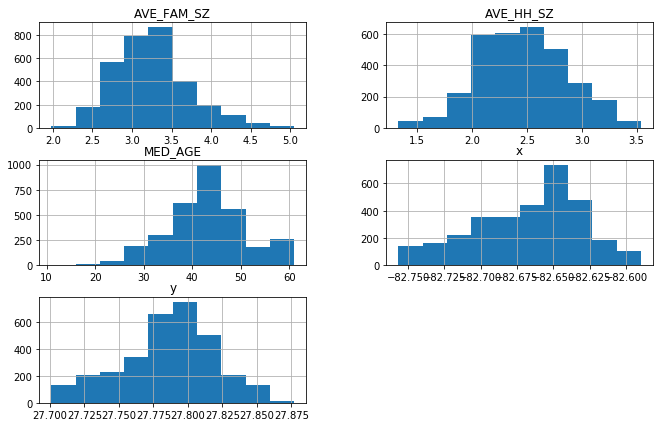

In [5]:
# plot histograms of target and features
% matplotlib inline
import pandas as pd
X_df = pd.DataFrame(data=X_train, columns=names)
X_df['price'] = y_train
_ = X_df.hist(column=['AVE_FAM_SZ', 'AVE_HH_SZ', 'MED_AGE', 'x', 'y'], figsize=FIGSIZE)

/home/tankofvines/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


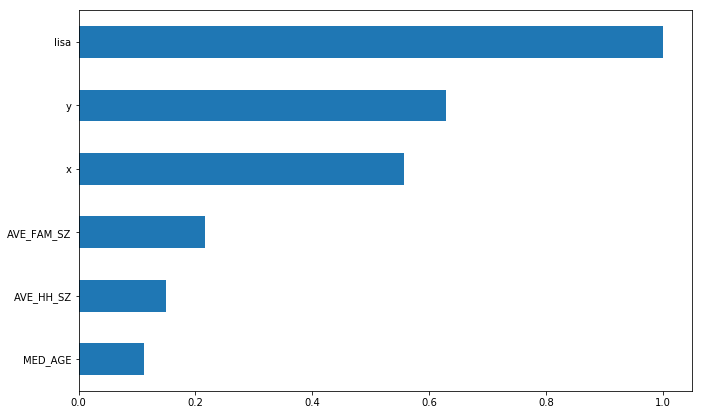

In [6]:
# Plot feature impact
fx_imp = pd.Series(est.feature_importances_, index=names)
fx_imp /= fx_imp.max()  # normalize
fx_imp.sort()
fx_imp.plot(kind='barh', figsize=FIGSIZE)

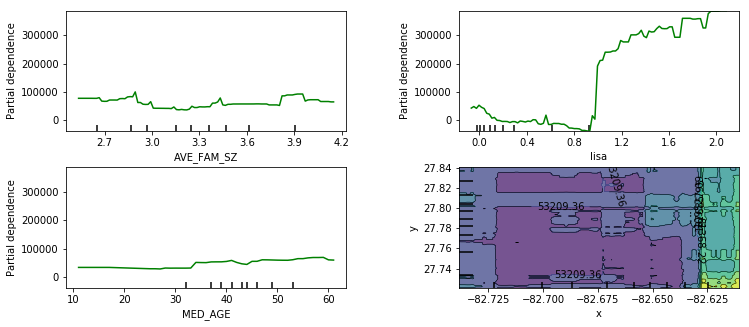

In [7]:
# 1 way and 2 way partial dependence for features
from sklearn.ensemble.partial_dependence import plot_partial_dependence

features = ['AVE_FAM_SZ', 'lisa', 'MED_AGE',
            ('x', 'y')]
fig, axs = plot_partial_dependence(est, X_train, features, feature_names=names, 
                                   n_cols=2, figsize=FIGSIZE)